### Pythagorean Expectation
Pythagorean Expectation is a statistical formula used in sports to estimate the number of games a team should have won based on the total number of runs(or points) they have scored and total number of runs allowed,
The basic idea behind Pythagorean expectation is to predict a team's winning percentage based on the ratio of their total runs scored to total runs allowed

### Pythagorean Expectation for Baseball
The formula for baseball can be expressed as:

Winning percentage = (Runs Scored)^2/ ((Runs Scored)^2 + (Runs Allowed)^2)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [52]:
MLB = pd.read_csv('game_log.csv')

C:\Users\range\AppData\Local\Temp\ipykernel_25204\2555469624.py:1: DtypeWarning: Columns (12,13,14,15,19,20,81,82,83,84,85,86,87,88,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types. Specify dtype option on import or set low_memory=False.
  MLB = pd.read_csv('game_log.csv')


In [53]:
print(MLB.columns.tolist())

['date', 'number_of_game', 'day_of_week', 'v_name', 'v_league', 'v_game_number', 'h_name', 'h_league', 'h_game_number', 'v_score', 'h_score', 'length_outs', 'day_night', 'completion', 'forefeit', 'protest', 'park_id', 'attendance', 'length_minutes', 'v_line_score', 'h_line_score', 'v_at_bats', 'v_hits', 'v_doubles', 'v_triples', 'v_homeruns', 'v_rbi', 'v_sacrifice_hits', 'v_sacrifice_flies', 'v_hit_by_pitch', 'v_walks', 'v_intentional_walks', 'v_strikeouts', 'v_stolen_bases', 'v_caught_stealing', 'v_grounded_into_double', 'v_first_catcher_interference', 'v_left_on_base', 'v_pitchers_used', 'v_individual_earned_runs', 'v_team_earned_runs', 'v_wild_pitches', 'v_balks', 'v_putouts', 'v_assists', 'v_errors', 'v_passed_balls', 'v_double_plays', 'v_triple_plays', 'h_at_bats', 'h_hits', 'h_doubles', 'h_triples', 'h_homeruns', 'h_rbi', 'h_sacrifice_hits', 'h_sacrifice_flies', 'h_hit_by_pitch', 'h_walks', 'h_intentional_walks', 'h_strikeouts', 'h_stolen_bases', 'h_caught_stealing', 'h_grounded_

In [54]:
MLB

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,NaN,1,FW1,NaN,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,NaN,1,WS3,NaN,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,18710506,0,Sat,CL1,NaN,2,RC1,NaN,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,18710508,0,Mon,CL1,NaN,3,CH1,NaN,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,18710509,0,Tue,BS1,NaN,2,TRO,NaN,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171902,20161002,0,Sun,MIL,NL,162,COL,NL,162,6,...,Pat Valaika,4.0,adamc001,Cristhian Adames,6.0,marqg001,German Marquez,1.0,NaN,Y
171903,20161002,0,Sun,NYN,NL,162,PHI,NL,162,2,...,Andres Blanco,6.0,altha001,Aaron Altherr,9.0,eickj001,Jerad Eickhoff,1.0,NaN,Y
171904,20161002,0,Sun,LAN,NL,162,SFN,NL,162,1,...,Joe Panik,4.0,gillc001,Conor Gillaspie,5.0,moorm003,Matt Moore,1.0,NaN,Y
171905,20161002,0,Sun,PIT,NL,162,SLN,NL,162,4,...,Jedd Gyorko,4.0,gricr001,Randal Grichuk,8.0,waina001,Adam Wainwright,1.0,NaN,Y


In [55]:
# For the Pythagorean Expectation we need only runs scored and conceded, and also the name of teams

MLB18 = MLB[['v_name','h_name','v_score','h_score','date']]
MLB18 = MLB18.rename(columns={'v_score': 'VisR','h_score':'HomR','v_name':'VisitingTeam','h_name':'HomeTeam'})
MLB18

,VisitingTeam,HomeTeam,VisR,HomR,date
0,CL1,FW1,0,2,18710504
1,BS1,WS3,20,18,18710505
2,CL1,RC1,12,4,18710506
3,CL1,CH1,12,14,18710508
4,BS1,TRO,9,5,18710509
...,...,...,...,...,...
171902,MIL,COL,6,4,20161002
171903,NYN,PHI,2,5,20161002
171904,LAN,SFN,1,7,20161002
171905,PIT,SLN,4,10,20161002


In [56]:
# We will need to know who won the game - which we can tell by knowing who scored more runs, the home team or the visiting team
# (There are No Ties in BaseBall)
# The variable 'hwin' is defined as 1 here if home team scored more runs otherwise 0
# The variable 'awin' is defined as 1 here if visiting team scored more runs otherwise 0
# we also create a counter variable 1 for each row

MLB18['hwin']=np.where(MLB18['HomR']>MLB18['VisR'],1,0)
MLB18['awin']=np.where(MLB18['HomR']<MLB18['VisR'],1,0)
MLB18['count']=1
MLB18

,VisitingTeam,HomeTeam,VisR,HomR,date,hwin,awin,count
0,CL1,FW1,0,2,18710504,1,0,1
1,BS1,WS3,20,18,18710505,0,1,1
2,CL1,RC1,12,4,18710506,0,1,1
3,CL1,CH1,12,14,18710508,1,0,1
4,BS1,TRO,9,5,18710509,0,1,1
...,...,...,...,...,...,...,...,...
171902,MIL,COL,6,4,20161002,0,1,1
171903,NYN,PHI,2,5,20161002,1,0,1
171904,LAN,SFN,1,7,20161002,1,0,1
171905,PIT,SLN,4,10,20161002,1,0,1


In [57]:
# Since our data refere to the games, for each game there are two teams, but what we want is a list of runs conceeded and
# runs scored by each team and its win percentage, to create this we gonna define tow data frames one for home teams and
# and one for away teams, which we can merge to get the stats of the entire season
#Here we define a Df for home team
#Team - Team Name
#hwin - home matches won by that particular team
#HomRh - Total runs scored by that particular team when playing in Home
#VisRH - Total runs scored by the opponents teams when playing against that particular team in their home ground you can say Total runs conceeded/Allowed by  that particular team when playing in Home
#Gh - Total matches played by that particular team in home

MLBhome = MLB18.groupby('HomeTeam')[['hwin', 'HomR', 'VisR', 'count']].sum().reset_index()
MLBhome = MLBhome.rename(columns={'HomeTeam': 'Team', 'VisR': 'VisRh', 'HomR': 'HomRh', 'count': 'Gh'})
MLBhome

,Team,hwin,HomRh,VisRh,Gh
0,ALT,6,73,156,18
1,ANA,790,6313,5863,1378
2,ARI,715,6560,6700,1377
3,ATL,1345,10892,10418,2475
4,BAL,1813,14614,14620,3424
...,...,...,...,...,...
142,WS7,10,137,181,30
143,WS8,91,1130,1380,251
144,WS9,27,389,519,72
145,WSN,265,3411,3350,545


In [58]:
#Same dataset we gonna create for teams for their away games
#awin - away from the home matches won by that particular team
#HomRa - Total runs conceeded/allowed by that particular team when playing away matches
#VisRa - Total runs scored by the team when they were playing away from the home
#Ga - Total away from the home matches played by that particular team 


MLBaway = MLB18.groupby('VisitingTeam')[['awin', 'HomR', 'VisR', 'count']].sum().reset_index()
MLBaway = MLBaway.rename(columns={'VisitingTeam': 'Team', 'VisR': 'VisRa', 'HomR': 'HomRa', 'count': 'Ga'})
MLBaway

,Team,awin,HomRa,VisRa,Ga
0,ALT,0,60,17,7
1,ANA,700,6224,6661,1376
2,ARI,623,6079,5772,1377
3,ATL,1179,10387,10436,2486
4,BAL,1579,15637,14855,3430
...,...,...,...,...,...
142,WS7,2,300,111,33
143,WS8,68,1857,1028,263
144,WS9,16,547,300,67
145,WSN,145,4359,2807,581


In [59]:
#Team - Name of The Team
#hwin - Number of games the team won in their home
#HomRh - The total runs scored by the team when they were playing in their home
#VisRh - The amount of runs conceeded by team when they were playing in their home(runs scored by opponents)
#Gh- Total number of matches played by the team in their home
#awin - Number of games the team won when they were playing away from home 
#HomRa - The total runs Conceeded/Allowed by the team when they were playing away from their home(runs scored by opponents)
#VisRa - The amount of runs scored by team when they were playing away from their home
#Gh- Total number of matches played by the team away from their home



MLB18 = pd.merge(MLBhome,MLBaway,on='Team')
MLB18

,Team,hwin,HomRh,VisRh,Gh,awin,HomRa,VisRa,Ga
0,ALT,6,73,156,18,0,60,17,7
1,ANA,790,6313,5863,1378,700,6224,6661,1376
2,ARI,715,6560,6700,1377,623,6079,5772,1377
3,ATL,1345,10892,10418,2475,1179,10387,10436,2486
4,BAL,1813,14614,14620,3424,1579,15637,14855,3430
...,...,...,...,...,...,...,...,...,...
141,WS7,10,137,181,30,2,300,111,33
142,WS8,91,1130,1380,251,68,1857,1028,263
143,WS9,27,389,519,72,16,547,300,67
144,WSN,265,3411,3350,545,145,4359,2807,581


In [60]:
#Now we create the total wins, games played, runs scored, and runs conceeded by summing the totals as home team and away team
#W - Total Matches Won by the team
#G - Total Matches Played by th team
#R - Total Runs Scored by the team in all the matches
#Ra - Total Runs allowed/conceeded by the team in all the matches
MLB18['W']= MLB18['hwin']+MLB18['awin']
MLB18['G']= MLB18['Gh']+MLB18['Ga']
MLB18['R']= MLB18['HomRh']+MLB18['VisRa']
MLB18['Ra']=MLB18['VisRh']+MLB18['HomRa']
MLB18

,Team,hwin,HomRh,VisRh,Gh,awin,HomRa,VisRa,Ga,W,G,R,Ra
0,ALT,6,73,156,18,0,60,17,7,6,25,90,216
1,ANA,790,6313,5863,1378,700,6224,6661,1376,1490,2754,12974,12087
2,ARI,715,6560,6700,1377,623,6079,5772,1377,1338,2754,12332,12779
3,ATL,1345,10892,10418,2475,1179,10387,10436,2486,2524,4961,21328,20805
4,BAL,1813,14614,14620,3424,1579,15637,14855,3430,3392,6854,29469,30257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,WS7,10,137,181,30,2,300,111,33,12,63,248,481
142,WS8,91,1130,1380,251,68,1857,1028,263,159,514,2158,3237
143,WS9,27,389,519,72,16,547,300,67,43,139,689,1066
144,WSN,265,3411,3350,545,145,4359,2807,581,410,1126,6218,7709


In [61]:
#The last step is in preparing data is to define win percentage and the Pythagorean Expectation
#WPC - Winning Percentage of the team
#PYTH - Pythagorean Expectation of the team
MLB18['WPC'] = MLB18['W']/MLB18['G']
MLB18['PYTH'] = MLB18['R']**2/((MLB18['R']**2)+(MLB18['Ra']**2))
MLB18

,Team,hwin,HomRh,VisRh,Gh,awin,HomRa,VisRa,Ga,W,G,R,Ra,WPC,PYTH
0,ALT,6,73,156,18,0,60,17,7,6,25,90,216,0.240000,0.147929
1,ANA,790,6313,5863,1378,700,6224,6661,1376,1490,2754,12974,12087,0.541031,0.535349
2,ARI,715,6560,6700,1377,623,6079,5772,1377,1338,2754,12332,12779,0.485839,0.482205
3,ATL,1345,10892,10418,2475,1179,10387,10436,2486,2524,4961,21328,20805,0.508768,0.512411
4,BAL,1813,14614,14620,3424,1579,15637,14855,3430,3392,6854,29469,30257,0.494893,0.486809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,WS7,10,137,181,30,2,300,111,33,12,63,248,481,0.190476,0.210008
142,WS8,91,1130,1380,251,68,1857,1028,263,159,514,2158,3237,0.309339,0.307692
143,WS9,27,389,519,72,16,547,300,67,43,139,689,1066,0.309353,0.294661
144,WSN,265,3411,3350,545,145,4359,2807,581,410,1126,6218,7709,0.364121,0.394155


C:\Users\range\anaconda3\4\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


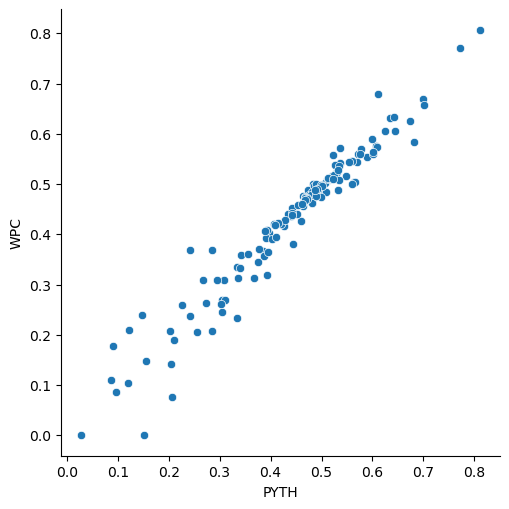

In [62]:
sns.relplot(x='PYTH',y='WPC',data= MLB18)

### Regression Plot 
The Regression output tells us many things about the relationship between win percentage and pythagorean Expectation,in case the relationship is :     

WPC = Intercept + Coef * PYTH

In [63]:
# Finally we generate a regression.

pyth_lm = smf.ols(formula = 'WPC ~ PYTH', data=MLB18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WPC   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     2200.
Date:                Sun, 26 May 2024   Prob (F-statistic):           3.97e-89
Time:                        12:02:17   Log-Likelihood:                 283.20
No. Observations:                 146   AIC:                            -562.4
Df Residuals:                     144   BIC:                            -556.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0053      0.010      0.553      0.581      -0.014       0.024
PYTH           0.9663      0.021     46.905      0.000       0.926       1.007
==============================================================================
Omnibus:                       27.677   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.294
Skew:                          -0.470   Prob(JB):                     1.14e-29
Kurtosis:                       7.585   Cond. No.                         8.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Pythagorean Expectation helps us to find out the teams which have overperformed from their expectations and Teams which are underachivers

Overperformance: If a team's actual winning percentage is significantly higher than its Pythagorean expectation, it suggests that the team has won more games than expected based on their runs or points scored and allowed

Underperformance: If a team's actual winning percentage is significantly lower than its Pythagorean expectation, it indicates the team has won fewer games than expected.

In [64]:
#Lets find out OverAchievers and UnderAchievers team
MLB18['Difference'] = MLB18['WPC'] - MLB18['PYTH']

# Identify overachievers and underachievers
overachievers = MLB18[MLB18['Difference'] > 0]
underachievers = MLB18[MLB18['Difference'] < 0]

print("Overachievers:")
print(overachievers[['Team', 'WPC', 'PYTH', 'Difference']])

print("\nUnderachievers:")
print(underachievers[['Team', 'WPC', 'PYTH', 'Difference']])

Overachievers:
    Team       WPC      PYTH  Difference
0    ALT  0.240000  0.147929    0.092071
1    ANA  0.541031  0.535349    0.005682
2    ARI  0.485839  0.482205    0.003634
4    BAL  0.494893  0.486809    0.008085
5    BFN  0.477134  0.463024    0.014110
13   BLU  0.537736  0.526338    0.011398
16   BR2  0.260417  0.225970    0.034447
21   BRP  0.571429  0.537145    0.034283
27   BUF  0.500000  0.482721    0.017279
29   CH1  0.678571  0.610939    0.067633
30   CH2  0.453125  0.441723    0.011402
38   CL2  0.440801  0.433956    0.006845
39   CL3  0.335821  0.334252    0.001569
41   CL5  0.487923  0.472918    0.015004
44   CLP  0.419847  0.406434    0.013414
45   CN1  0.359195  0.341598    0.017597
47   CN3  0.421569  0.419849    0.001719
53   FLO  0.495881  0.485929    0.009951
54   FW1  0.368421  0.241191    0.127230
56   HOU  0.477580  0.474734    0.002846
62   KC1  0.402427  0.397174    0.005253
63   KC2  0.361624  0.355685    0.005939
64   KCA  0.475212  0.467604    0.007608
6

In [65]:
overachievers['Team'].to_list()

['ALT',
 'ANA',
 'ARI',
 'BAL',
 'BFN',
 'BLU',
 'BR2',
 'BRP',
 'BUF',
 'CH1',
 'CH2',
 'CL2',
 'CL3',
 'CL5',
 'CLP',
 'CN1',
 'CN3',
 'FLO',
 'FW1',
 'HOU',
 'KC1',
 'KC2',
 'KCA',
 'KCU',
 'LAN',
 'LS1',
 'MIN',
 'MON',
 'NY3',
 'NYN',
 'PHA',
 'PTP',
 'SDN',
 'SE1',
 'SL1',
 'SL2',
 'SR1',
 'SR2',
 'TBA',
 'TL1',
 'TRN',
 'WAS',
 'WIL',
 'WS2',
 'WS6',
 'WS8',
 'WS9']

In [66]:
underachievers['Team'].to_list()

['ATL',
 'BFP',
 'BL1',
 'BL2',
 'BL4',
 'BLA',
 'BLF',
 'BLN',
 'BOS',
 'BR1',
 'BR3',
 'BR4',
 'BRF',
 'BRO',
 'BS1',
 'BS2',
 'BSN',
 'BSP',
 'BSU',
 'CAL',
 'CHA',
 'CHF',
 'CHN',
 'CHP',
 'CHU',
 'CIN',
 'CL1',
 'CL4',
 'CL6',
 'CLE',
 'CN2',
 'CNU',
 'COL',
 'DET',
 'DTN',
 'ELI',
 'HAR',
 'HR1',
 'IN1',
 'IN2',
 'IN3',
 'IND',
 'KCF',
 'KCN',
 'KEO',
 'LAA',
 'LS2',
 'LS3',
 'MIA',
 'MID',
 'MIL',
 'ML2',
 'ML3',
 'MLA',
 'MLN',
 'NEW',
 'NH1',
 'NY1',
 'NY2',
 'NY4',
 'NYA',
 'NYP',
 'OAK',
 'PH1',
 'PH2',
 'PH3',
 'PH4',
 'PHI',
 'PHN',
 'PHP',
 'PHU',
 'PIT',
 'PRO',
 'PT1',
 'PTF',
 'RC1',
 'RC2',
 'RIC',
 'SEA',
 'SFN',
 'SL3',
 'SL4',
 'SL5',
 'SLA',
 'SLF',
 'SLN',
 'SLU',
 'TEX',
 'TL2',
 'TOR',
 'TRO',
 'WOR',
 'WS1',
 'WS3',
 'WS4',
 'WS5',
 'WS7',
 'WSN',
 'WSU']